In [1]:
import requests
from bs4 import BeautifulSoup
import time
import random
import math
import sqlite3
import pandas as pd
import numpy as np
import urllib
from lxml import etree
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import sqlite3
import pickle
import math
import numpy as np

In [2]:
all_individuals = pd.read_pickle("individualstats.pkl")
all_teamstats = pd.read_pickle("1920teamstats.pkl")

In [3]:
all_teamstats

,G,MPTotal,FGMadeTotal,FGATotal,FGPerc,ThreeMadeTotal,ThreeATotal,ThreePerc,TwoMadeTotal,TwoATotal,...,3PAr,OeFGPerc,OTOVPerc,ORBPerc,OFT/FGA,DeFGPerc,DTOVPerc,DRBPerc,DFT/FGA,Team
0,65.0,15650,2830,5928,0.477,893,2510,0.356,1937,3418,...,0.423,0.553,12.8,20.7,0.196,0.486,12.2,81.7,0.172,MIL
1,64.0,15460,2596,5665,0.458,880,2369,0.371,1716,3296,...,0.418,0.536,12.8,21.6,0.205,0.502,14.6,76.1,0.200,TOR
2,64.0,15485,2634,5735,0.459,794,2190,0.363,1840,3545,...,0.382,0.529,12.0,23.9,0.204,0.510,13.6,77.5,0.212,BOS
3,65.0,15825,2576,5486,0.470,868,2265,0.383,1708,3221,...,0.413,0.549,13.5,20.5,0.231,0.522,12.3,79.7,0.208,MIA
4,65.0,15700,2740,5744,0.477,648,1787,0.363,2092,3957,...,0.311,0.533,11.9,20.3,0.170,0.513,12.8,77.1,0.193,IND
5,65.0,15675,2651,5701,0.465,742,2052,0.362,1909,3649,...,0.360,0.530,12.7,23.7,0.189,0.522,12.7,80.4,0.211,PHI
6,64.0,15560,2558,5763,0.444,824,2423,0.340,1734,3340,...,0.420,0.515,13.4,23.5,0.199,0.507,10.9,77.8,0.181,BRK
7,65.0,15625,2550,5773,0.442,710,2080,0.341,1840,3693,...,0.360,0.503,11.4,22.4,0.191,0.535,13.5,79.0,0.170,ORL
8,64.0,15435,2682,5821,0.461,788,2117,0.372,1894,3704,...,0.364,0.528,12.1,22.0,0.214,0.560,14.0,74.9,0.230,WAS
9,65.0,15750,2425,5586,0.434,785,2231,0.352,1640,3355,...,0.399,0.504,13.3,23.9,0.188,0.546,13.1,74.4,0.159,CHO


In [4]:
all_individuals

,Name,Age,G,GS,MP/G,FGMade/G,FGA/G,FGPerc,ThreeMade/G,ThreeA/G,...,OFoulsC,ShootFoulsD,OFoulsD,PGA,FAAnd1,FABlkd,Salary,Ht,Exp,Team
0,Brook Lopez,31,61,60,26.6,4.0,9.4,0.427,1.4,4.7,...,18,61,3,240,13,20,12093024,84.0,11,MIL
1,D.J. Wilson,23,31,0,9.0,1.3,3.3,0.396,0.5,1.8,...,1,5,3,54,1,3,2961120,82.0,2,MIL
2,Donte DiVincenzo,23,59,22,23.1,3.5,7.7,0.462,1.3,3.7,...,8,30,17,317,2,23,2905800,76.0,1,MIL
3,Dragan Bender,22,7,0,13.0,1.4,3.0,0.476,0.6,1.3,...,0,2,0,21,1,4,1678854,NaN,NaN,MIL
4,Eric Bledsoe,30,56,56,27.2,5.7,11.8,0.482,1.3,3.6,...,23,98,15,733,31,37,15625000,73.0,9,MIL
5,Ersan İlyasova,32,56,8,16.0,2.4,5.2,0.472,0.8,2.2,...,5,31,17,117,7,13,7000000,81.0,11,MIL
6,Frank Mason,25,6,0,8.8,0.8,3.2,0.263,0.3,1.7,...,0,2,0,29,0,3,NaN,NaN,NaN,MIL
7,George Hill,33,52,0,21.2,3.4,6.5,0.530,1.4,2.9,...,4,24,16,361,4,20,9133907,75.0,11,MIL
8,Giannis Antetokounmpo,25,57,57,30.9,10.9,20.0,0.547,1.5,4.8,...,55,276,10,836,86,64,25842697,83.0,6,MIL
9,Khris Middleton,28,55,52,30.1,7.7,15.5,0.499,2.4,5.8,...,19,73,10,519,15,33,30603448,79.0,7,MIL


In [5]:
#fix percent as position
for column in ['PercasPG', 'PercasSG', 'PercasSF', 'PercasPF', 'PercasC']:    
    all_individuals[column].fillna('0%', inplace = True) 

for idx, x in enumerate(all_individuals.PercasPG):
        all_individuals.loc[idx, 'PercasPG'] = x[:-1]
        all_individuals.loc[idx, 'PercasSG'] = all_individuals.PercasSG.iloc[idx][:-1]
        all_individuals.loc[idx, 'PercasSF'] = all_individuals.PercasSF.iloc[idx][:-1]
        all_individuals.loc[idx, 'PercasPF'] = all_individuals.PercasPF.iloc[idx][:-1]
        all_individuals.loc[idx, 'PercasC'] = all_individuals.PercasC.iloc[idx][:-1]
    
all_individuals.PercasPG = all_individuals.PercasPG.astype('float64')
all_individuals.PercasSG = all_individuals.PercasSG.astype('float64')
all_individuals.PercasSF = all_individuals.PercasSF.astype('float64')
all_individuals.PercasPF = all_individuals.PercasPF.astype('float64')
all_individuals.PercasC = all_individuals.PercasC.astype('float64')

all_individuals.PercasPG = all_individuals.PercasPG/100
all_individuals.PercasSG = all_individuals.PercasSG/100
all_individuals.PercasSF = all_individuals.PercasSF/100
all_individuals.PercasPF = all_individuals.PercasPF/100
all_individuals.PercasC = all_individuals.PercasC/100

In [6]:
#add other stats
for idx, value in enumerate(all_individuals.Name):
    val = (all_individuals['PTS/G'].iloc[idx])*(all_individuals['TRB/G'].iloc[idx])*(all_individuals['AST/G'].iloc[idx])
    all_individuals.loc[idx, 'VI'] = np.sign(val)*(np.abs(val)**(1/3))

    percpos = max(all_individuals['PercasPG'].iloc[idx], all_individuals['PercasSG'].iloc[idx], all_individuals['PercasSF'].iloc[idx],
                  all_individuals['PercasPF'].iloc[idx], all_individuals['PercasC'].iloc[idx])
    all_individuals.loc[idx, 'PAWS'] = ((all_individuals['WS/48'].iloc[idx])/48)*((all_individuals['MP/G'].iloc[idx])*percpos)

    all_individuals.loc[idx, 'NSPTotal'] = ((all_individuals['FGATotal'].iloc[idx])-(all_individuals['FGMadeTotal'].iloc[idx])) + 0.4*(all_individuals['FTATotal'].iloc[idx]) + (all_individuals['TOVTotal'].iloc[idx])
    all_individuals.loc[idx, 'NSP/G'] = (all_individuals['NSPTotal'].iloc[idx])/(all_individuals['G'].iloc[idx])

    all_individuals.loc[idx, 'SL'] = 27 - (0.75*(all_individuals['Age'].iloc[idx]))

    credits=(all_individuals['PTSTotal'].iloc[idx]+all_individuals['TRBTotal'].iloc[idx]+all_individuals['ASTTotal'].iloc[idx]+all_individuals['STLTotal'].iloc[idx]+all_individuals['BLKTotal'].iloc[idx]-(all_individuals['FGATotal'].iloc[idx]-all_individuals['FGMadeTotal'].iloc[idx])-(all_individuals['FTATotal'].iloc[idx]-all_individuals['FTMadeTotal'].iloc[idx])-all_individuals['TOVTotal'].iloc[idx])
    all_individuals.loc[idx, 'AV'] = (np.sign(credits)*(np.abs(credits)**(3/4)))/21

In [7]:
all_individuals = all_individuals.loc[all_individuals['MP/G'] >= 12]
all_individuals = all_individuals.loc[all_individuals.G >= 10]
all_individuals.reset_index(drop = True, inplace = True)

In [8]:
null_columns = list(all_individuals.columns[all_individuals.isnull().any()])
for column in [elem for elem in null_columns if elem not in ['Salary', 'Ht', 'Exp']]:
    all_individuals[column] = all_individuals[column].fillna(0)

In [9]:
null_columns=list(all_individuals.columns[all_individuals.isnull().any()])
all_individuals[null_columns].isnull().sum()

Salary    42
Ht        53
Exp       53
dtype: int64

In [10]:
option = webdriver.ChromeOptions()
option.add_argument(" — incognito")
driver = webdriver.Chrome(executable_path='/Users/Anubhav/Desktop/Flatiron School/QCstats/chromedriver', options=option)

In [11]:
nullrows = all_individuals[all_individuals.isnull().any(axis=1)]
nullrows

,Name,Age,G,GS,MP/G,FGMade/G,FGA/G,FGPerc,ThreeMade/G,ThreeA/G,...,Salary,Ht,Exp,Team,VI,PAWS,NSPTotal,NSP/G,SL,AV
41,James Johnson,32,18,0,15.6,2.2,4.8,0.448,0.9,2.5,...,NaN,NaN,NaN,MIA,2.706978,0.020377,68.6,3.811111,3.00,1.780177
43,Justise Winslow,23,11,5,32.0,4.5,11.7,0.388,0.5,2.5,...,NaN,NaN,NaN,MIA,6.681810,-0.001160,113.8,10.345455,9.75,1.948476
65,James Ennis,29,49,0,15.8,2.0,4.6,0.442,0.8,2.2,...,NaN,NaN,NaN,PHI,2.431979,0.033009,181.4,3.702041,5.25,3.795345
72,Trey Burke,27,25,0,13.2,2.4,5.1,0.465,0.6,1.5,...,2028594,NaN,NaN,PHI,2.588609,0.035475,87.2,3.488000,6.75,2.122138
74,David Nwaba,27,20,0,13.4,1.9,3.6,0.521,0.6,1.4,...,1678854,NaN,NaN,BRK,1.684989,0.021010,52.8,2.640000,6.75,1.822733
77,Iman Shumpert,29,13,0,18.5,1.6,4.9,0.328,0.6,2.5,...,419443,NaN,NaN,BRK,2.142011,-0.000258,55.8,4.292308,5.25,1.000810
84,Taurean Waller-Prince,25,64,61,29.0,4.3,11.5,0.376,2.3,6.7,...,3481986,NaN,NaN,BRK,5.074614,0.009528,623.6,9.743750,8.25,6.797275
97,Mohamed Bamba,21,60,0,14.5,2.2,4.7,0.468,0.6,1.7,...,NaN,NaN,NaN,ORL,2.680054,0.042292,210.4,3.506667,11.25,5.576949
103,C.J. Miles,32,10,0,16.1,1.9,5.9,0.322,1.1,3.5,...,8730158,NaN,NaN,WAS,2.096593,0.010958,52.0,5.200000,3.00,0.935379
104,Chris Chiozza,24,10,0,12.3,1.0,3.4,0.294,0.7,1.6,...,NaN,NaN,NaN,WAS,2.246662,-0.000513,33.0,3.300000,9.00,0.881917


In [12]:
nullrows = all_individuals[all_individuals.isnull().any(axis=1)]
for row in zip(nullrows.Name.index, nullrows.Name):
    if row[1] == "D'Angelo Russell":
        pass
    else:
        url = 'https://www.basketball-reference.com/players/' + nullrows.Name[row[0]].lower().split()[1][0]
        driver.get(url)
        WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.ID, "players")))
        playerpath = "//strong/a[contains(text(), '" + row[1] + "')]"
        driver.get(driver.find_element_by_xpath(playerpath).get_attribute('href'))

        WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.ID, "meta")))

        try:
            driver.find_element_by_css_selector('button[id="meta_more_button"]').click()
        except NoSuchElementException or StaleElementReferenceException:
            pass

        idpath = 'table[id="contracts_' + all_individuals.Team.iloc[row[0]].lower() + '"]'
        try:
            contracttable = pd.read_html(driver.find_element_by_css_selector(idpath).get_attribute('outerHTML'))[0]
            if contracttable.empty == True:
                pass
            else:
                all_individuals.loc[row[0], 'Salary'] = contracttable['2019-20'][0].replace(',', '')[1:]
        except NoSuchElementException or StaleElementReferenceException:
            try:
                contracttable = pd.read_html(driver.find_element_by_xpath("//*[contains(text(), 'Contract Table')]").find_element_by_xpath('..').get_attribute('outerHTML'))[0]
                if contracttable.empty == True:
                    pass
                else:
                    all_individuals.loc[row[0], 'Salary'] = contracttable['2019-20'][0].replace(',', '')[1:]
            except NoSuchElementException or StaleElementReferenceException:
                pass

        Ht = driver.find_element_by_css_selector("span[itemprop='height']").text
        Ht = int(Ht.split('-')[0])*12 + int(Ht.split('-')[1])
        all_individuals.loc[row[0], 'Ht'] = Ht

        if driver.find_element_by_css_selector('div[id="meta"]').text.split()[-1] == 'years':
            all_individuals.loc[row[0], 'Exp'] = driver.find_element_by_css_selector('div[id="meta"]').text.split()[-2]
        else:
            all_individuals.loc[row[0], 'Exp'] = 'R'

In [13]:
null_columns=list(all_individuals.columns[all_individuals.isnull().any()])
all_individuals[null_columns].isnull().sum()

Salary    2
Ht        1
Exp       1
dtype: int64

In [14]:
nullrows = all_individuals[all_individuals.isnull().any(axis=1)]
nullrows

,Name,Age,G,GS,MP/G,FGMade/G,FGA/G,FGPerc,ThreeMade/G,ThreeA/G,...,Salary,Ht,Exp,Team,VI,PAWS,NSPTotal,NSP/G,SL,AV
104,Chris Chiozza,24,10,0,12.3,1.0,3.4,0.294,0.7,1.6,...,NaN,71.0,R,WAS,2.246662,-0.000513,33.0,3.300000,9.00,0.881917
378,D'Angelo Russell,23,33,33,32.1,8.3,19.2,0.430,3.6,9.7,...,NaN,NaN,NaN,GSW,8.150204,0.034327,520.6,15.775758,9.75,6.151281


In [15]:
#storing D'Angelo Russell's Salary, Height, and Experience for his duplicate row since all values are same for both
all_individuals.loc[378, 'Salary'] = all_individuals.Salary.iloc[360]
all_individuals.loc[378, 'Ht'] = all_individuals.Ht.iloc[360]
all_individuals.loc[378, 'Exp'] = all_individuals.Exp.iloc[360]

#manually storing Chris Chiozza's salary in his row, although he had a 2-way contract
#he is an exception as his stats qualify for my restrictions on games played and minuts averaged per game
#information found on hoophype
all_individuals.loc[104, 'Salary'] = 79568

In [16]:
null_columns=list(all_individuals.columns[all_individuals.isnull().any()])
all_individuals[null_columns].isnull().sum()

Series([], dtype: float64)

In [17]:
for idx, val in enumerate(all_individuals.Exp):
    if val == 'R':
        all_individuals.loc[idx, 'Exp'] = 0
    else:
        pass

for column in ['MP/THREESIX', 'MP/Hund', 'DRTG']:
    all_individuals[column] = all_individuals[column].astype('float64')
    
for column in ['Salary', 'Ht', 'Exp']:
    all_individuals[column] = all_individuals[column].astype('int64')

In [18]:
all_individuals.to_pickle("individualstatsnanfree.pkl")

In [2]:
all_individuals = pd.read_pickle("individualstatsnanfree.pkl")

In [183]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

scaler = StandardScaler()
data_std = scaler.fit_transform(all_individuals.drop(['Name', 'Team'], axis = 1))

pca = PCA()
pca.fit(data_std)
display(pca.explained_variance_ratio_)

array([3.29822802e-01, 1.96573662e-01, 7.06073116e-02, 5.11206872e-02,
       4.14600111e-02, 3.31085454e-02, 2.75057833e-02, 2.33147534e-02,
       2.02620748e-02, 1.70958432e-02, 1.47862784e-02, 1.30123467e-02,
       1.07390234e-02, 9.85500891e-03, 9.77576080e-03, 9.29151427e-03,
       8.21116127e-03, 7.74446696e-03, 7.16698933e-03, 7.05338269e-03,
       6.12329203e-03, 5.97360624e-03, 5.79905160e-03, 5.21615322e-03,
       4.76042289e-03, 4.55842322e-03, 4.26757104e-03, 4.12649065e-03,
       3.87365657e-03, 3.66412518e-03, 3.60776357e-03, 3.22590672e-03,
       3.08881225e-03, 2.93233018e-03, 2.65767961e-03, 2.38484009e-03,
       1.95771414e-03, 1.83932378e-03, 1.74022740e-03, 1.64021481e-03,
       1.36702676e-03, 1.34606605e-03, 1.28567973e-03, 9.91653039e-04,
       9.57542274e-04, 9.07997361e-04, 8.41978871e-04, 8.06612504e-04,
       7.32148019e-04, 7.06877199e-04, 6.75369232e-04, 5.75643094e-04,
       5.65810566e-04, 5.44869077e-04, 4.87202939e-04, 4.71541070e-04,
      

Text(0.5, 0, 'Number of Components')

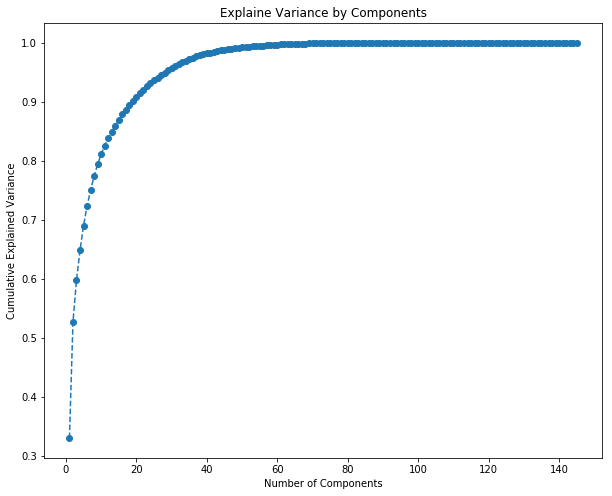

In [184]:
plt.figure(figsize = (10,8))
plt.plot(range(1,146), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explaine Variance by Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')

In [217]:
pca = PCA(n_components = 2)
pca.fit(data_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [218]:
data_pca = pca.transform(data_std)

In [219]:
clusters = []
for i in range(1,26):
    kmeans_pca = KMeans(n_clusters = i, init= 'k-means++', random_state = 4)
    kmeans_pca.fit(data_pca)
    clusters.append(kmeans_pca.inertia_)

Text(0.5, 0, 'Number of Clusters')

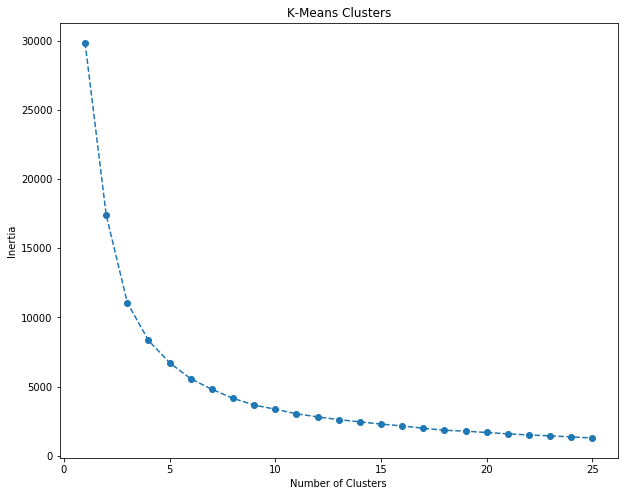

In [220]:
plt.figure(figsize = (10,8))
plt.plot(range(1,26), clusters, marker = 'o', linestyle = '--')
plt.title('K-Means Clusters')
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')

In [265]:
kmeans_pca = kmeans_pca = KMeans(n_clusters = 8, init= 'k-means++', random_state = 42)
clusters = kmeans_pca.fit(data_pca)

In [266]:
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [267]:
y_hat = clusters.predict(data_pca)

In [268]:
from sklearn import metrics
labels = clusters.labels_
display(metrics.silhouette_score(data_pca, labels, metric = 'euclidean'))
metrics.calinski_harabasz_score(data_pca, labels)

0.3894086135456499

338.13677949453086

In [269]:
principalDf = pd.DataFrame(data_pca, columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, pd.Series(y_hat)], axis = 1)
finalDf.rename(columns = {0: 'target'}, inplace = True)

In [270]:
finalDf

,PC1,PC2,target
0,1.900057,3.012211,5
1,0.362343,-0.573943,5
2,8.140649,-2.118038,6
3,-2.354755,3.318730,5
4,-0.521371,-1.640142,5
...,...,...,...
386,-8.486571,4.058476,0
387,-4.049713,-3.104312,3
388,3.212252,8.673182,7
389,-2.613974,1.683516,5


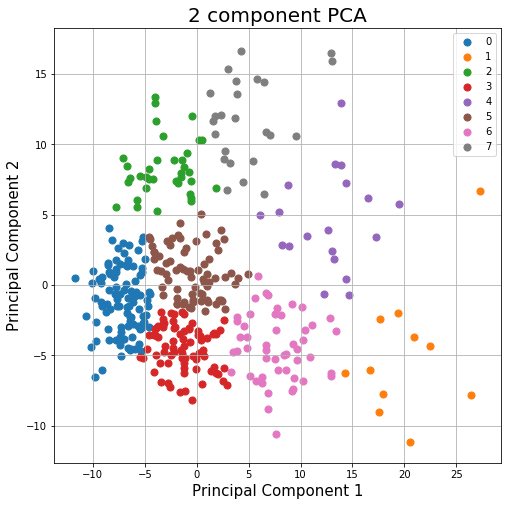

In [271]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2, 3, 4, 5, 6, 7]
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [274]:
finalDf = pd.concat([all_individuals, pd.Series(y_hat)], axis = 1)
finalDf.rename(columns = {0: 'target'}, inplace = True)

In [291]:
finalDf[finalDf.target == 1]

,Name,Age,G,GS,MP/G,FGMade/G,FGA/G,FGPerc,ThreeMade/G,ThreeA/G,...,Ht,Exp,Team,VI,PAWS,NSPTotal,NSP/G,SL,AV,target
5,Giannis Antetokounmpo,25,57,57,30.9,10.9,20.0,0.547,1.5,4.8,...,83,6,MIL,13.298830,0.139784,953.0,16.719298,8.25,14.161234,1
102,Bradley Beal,26,57,57,36.0,10.4,22.9,0.455,3.0,8.4,...,75,7,WAS,9.210707,0.073185,1086.8,19.066667,7.50,11.177820,1
146,Zach LaVine,24,60,60,34.8,9.0,20.0,0.450,3.1,8.1,...,78,5,CHI,8.010819,0.044689,999.6,16.660000,9.00,10.052687,1
191,Trae Young,21,60,60,35.3,9.1,20.8,0.437,3.4,9.5,...,73,1,ATL,10.578263,0.096575,1215.6,20.260000,11.25,12.024177,1
215,LeBron James,35,60,60,34.9,9.8,19.6,0.498,2.2,6.4,...,81,16,LAL,12.910866,0.090347,966.2,16.103333,0.75,13.290745,1
219,Kawhi Leonard,28,51,51,32.2,9.3,19.9,0.469,2.1,5.7,...,79,8,LAC,9.939130,0.093823,820.0,16.078431,6.00,10.904589,1
266,James Harden,30,61,61,36.7,9.9,22.7,0.435,4.4,12.6,...,77,10,HOU,11.766755,0.103028,1343.6,22.026230,4.50,13.903621,1
270,Russell Westbrook,31,53,53,35.9,10.7,22.6,0.474,1.0,3.8,...,75,11,HOU,11.548004,0.081523,1005.4,18.969811,3.75,10.974565,1
279,Luka Dončić,20,54,54,33.3,9.5,20.6,0.461,2.9,9.1,...,79,1,DAL,13.242237,0.120817,1022.4,18.933333,12.00,12.283173,1
302,Damian Lillard,29,58,58,36.9,9.2,20.0,0.457,3.9,9.9,...,74,7,POR,9.896622,0.165281,974.2,16.796552,5.25,12.114472,1
